# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load data
df = pd.read_csv(r'C:\Users\Admin\Downloads\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
#Check the total enteries
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [6]:
#Check the data type of the each column
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object


In [7]:
#Check wether there is any null values in the columns
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [8]:
#Check the unick values in the each column
print(df.nunique())

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64


In [9]:
#The summary of the data
print(df.describe())

               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000


In [10]:
df.duplicated().sum()

1

In [11]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [12]:
df = df.drop_duplicates()

In [13]:
df = df.reset_index(drop = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [15]:
cat_df = df.select_dtypes(exclude = ['number']).columns
print("Categorical columns:", cat_df)

Categorical columns: Index(['sex', 'smoker', 'region'], dtype='object')


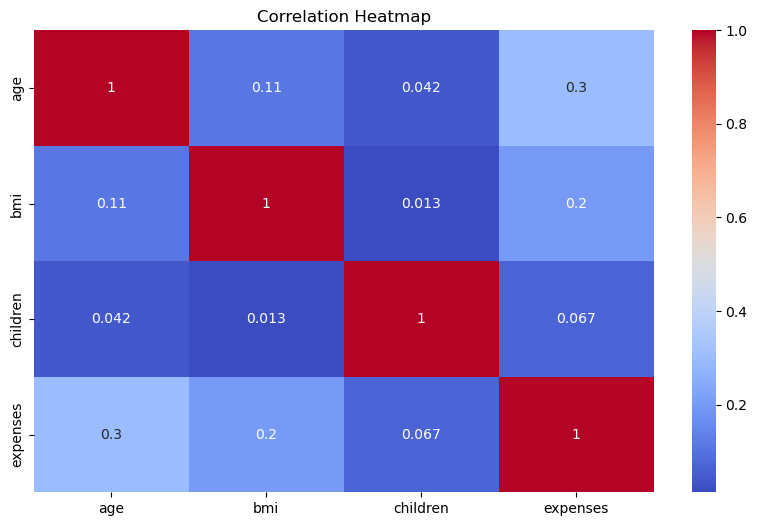

In [16]:
num_df = df.drop(columns =['sex','smoker','region'] )
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

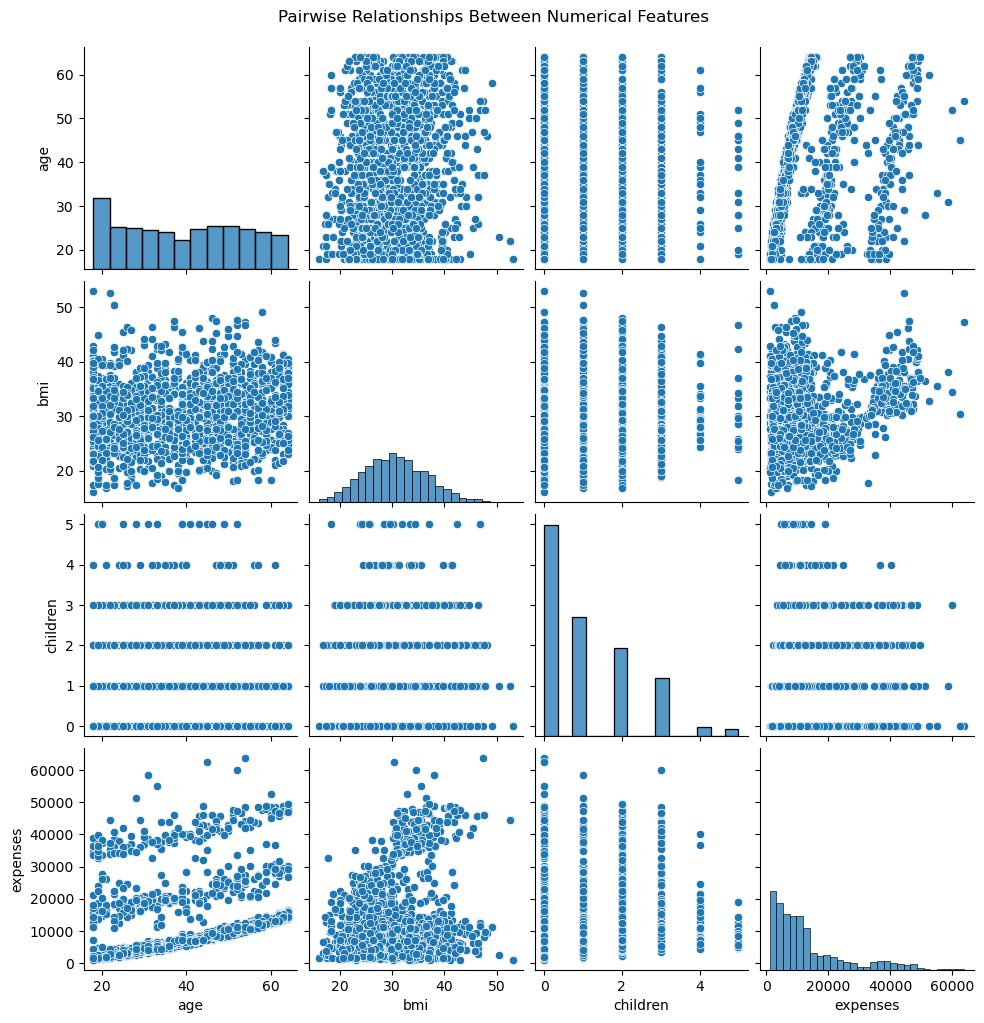

In [17]:
numeric_cols = df.select_dtypes(include=[np.number])
sns.pairplot(numeric_cols)
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
plt.show()

64
18
age_bin
15-20    165
45-50    144
20-25    140
50-55    140
25-30    138
40-45    137
30-35    130
35-40    127
55-60    125
60-65     91
10-15      0
Name: count, dtype: int64


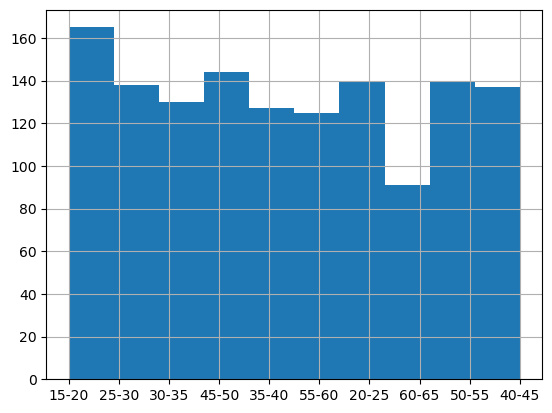

In [18]:
#Creat the histogram for the age to see total number of individual who fall in the perticular age.
print(df['age'].max())
print(df['age'].min())
#Discretization=Break down the contenious value into bins to see the total number of counts fall in that bins.
df_age = df.copy()
df_age['age_bin']=pd.cut(x=df['age'],bins=np.arange(10,70,5),right=True).apply(lambda x:str(x.left)+'-'+str(x.right))
print(df_age['age_bin'].value_counts())
df_age['age_bin'].hist()
plt.show()

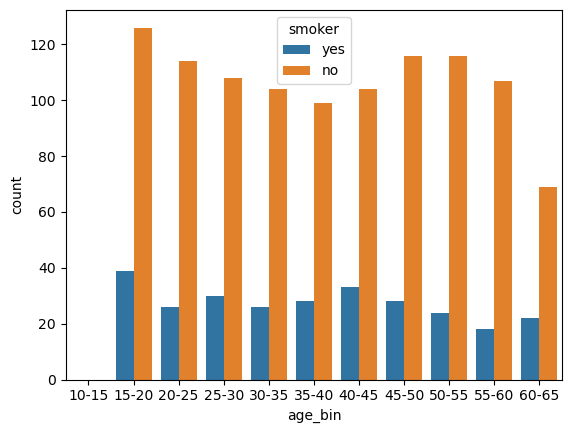

In [19]:
#Age v/s smokers
sns.countplot(x='age_bin',hue='smoker',data=df_age)
plt.show()

The smoking rate is heigh between the age of 15-20,followed by 40-45.

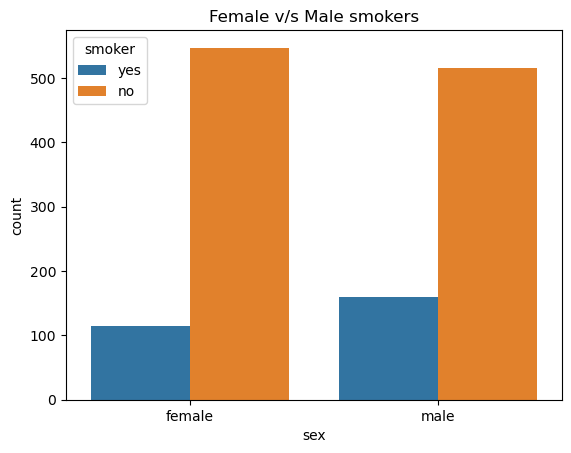

In [21]:
#Count number of female smokers and the male smokers
sns.countplot(x='sex',hue='smoker',data=df)
plt.title('Female v/s Male smokers')
plt.show()

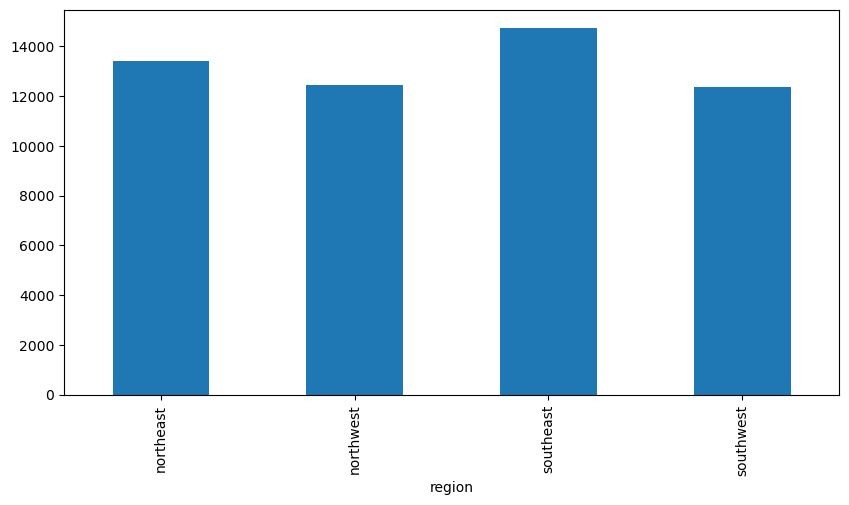

In [22]:
#Region wise average expenses
df.groupby('region')['expenses'].mean().plot(kind='bar',figsize=(10,5))
plt.show()

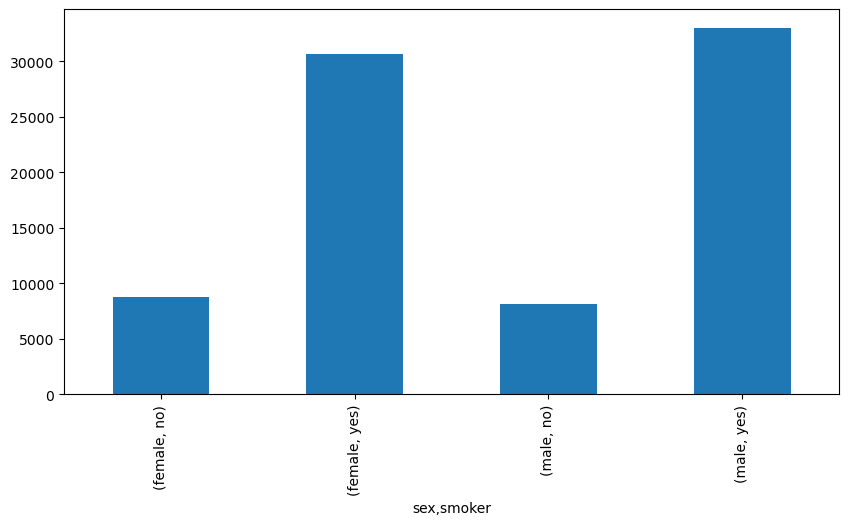

In [23]:
#Plot the average expenses based on the smokeing and the gender
df.groupby(['sex','smoker'])['expenses'].mean().plot(kind='bar',figsize=(10,5))
plt.show()

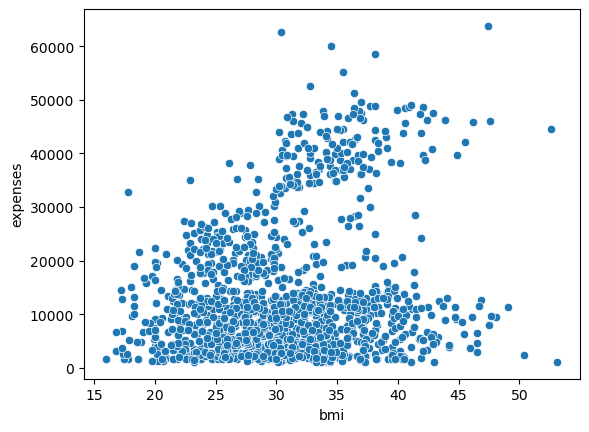

In [24]:
#Body Mass index(bmi) v/s expenses
sns.scatterplot(x='bmi',y='expenses',data=df)
plt.show()

## Outliers

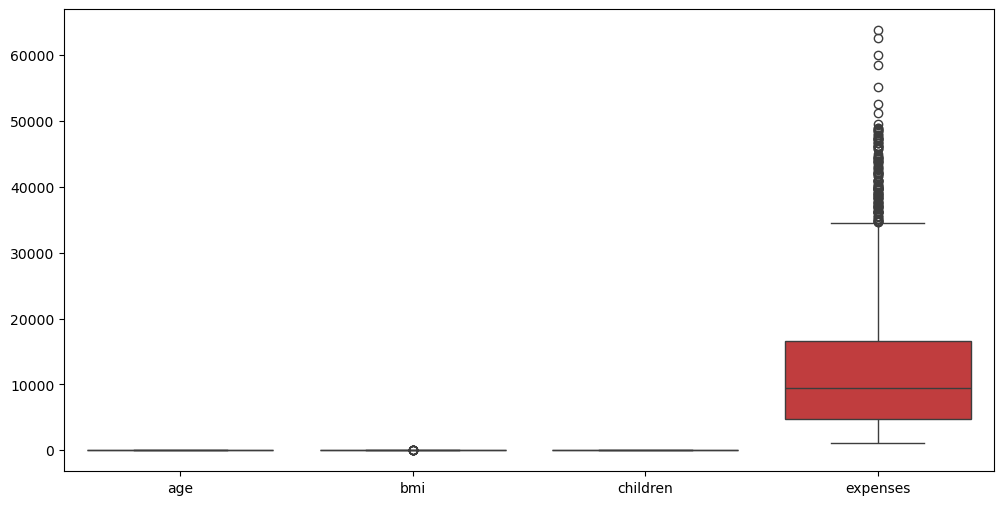

In [26]:
#Check for the oulier in the Numeric Column
plt.figure(figsize = (12,6))
sns.boxplot(num_df)
plt.show()

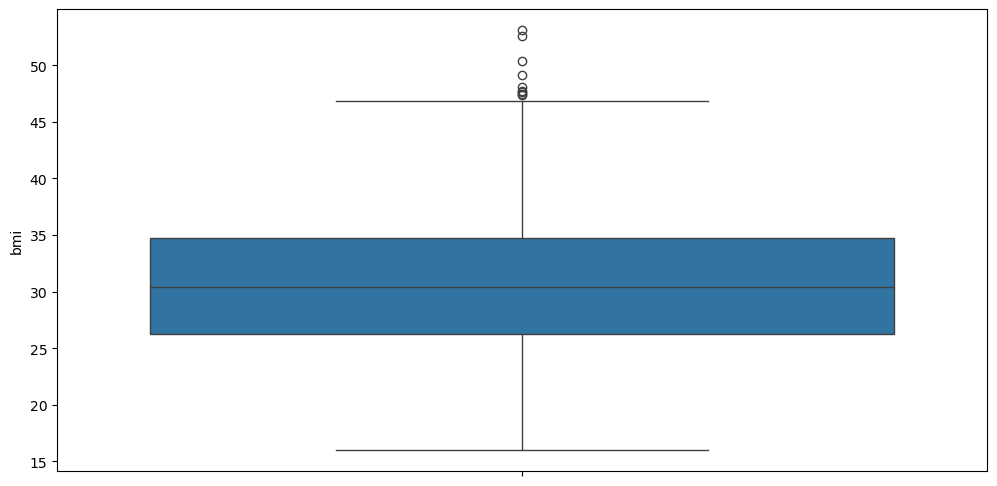

In [27]:
plt.figure(figsize = (12,6))
sns.boxplot(num_df['bmi'])
plt.show()

In [28]:
Q1_b=df['bmi'].quantile(0.25)
Q3_b=df['bmi'].quantile(0.75)
IQR_b=Q3_b-Q1_b
upper_limit_b=Q3_b+1.5*IQR_b
lower_limit_b=Q1_b-1.5*IQR_b
df['bmi_cap']=np.where(df['bmi']>upper_limit_b,upper_limit_b,np.where(df['bmi']<lower_limit_b,lower_limit_b,df['bmi']))

In [29]:
df

,age,sex,bmi,children,smoker,region,expenses,bmi_cap
0,19,female,27.9,0,yes,southwest,16884.92,27.9
1,18,male,33.8,1,no,southeast,1725.55,33.8
2,28,male,33.0,3,no,southeast,4449.46,33.0
3,33,male,22.7,0,no,northwest,21984.47,22.7
4,32,male,28.9,0,no,northwest,3866.86,28.9
...,...,...,...,...,...,...,...,...
1332,50,male,31.0,3,no,northwest,10600.55,31.0
1333,18,female,31.9,0,no,northeast,2205.98,31.9
1334,18,female,36.9,0,no,southeast,1629.83,36.9
1335,21,female,25.8,0,no,southwest,2007.95,25.8


# Encoding Categorical Columns

In [30]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.astype(int)
df_encoded.head()

,age,bmi,children,expenses,bmi_cap,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,27,0,1,0,0,1
1,18,33,1,1725,33,1,0,0,1,0
2,28,33,3,4449,33,1,0,0,1,0
3,33,22,0,21984,22,1,0,1,0,0
4,32,28,0,3866,28,1,0,1,0,0


In [31]:
data = df_encoded.drop(columns = ['bmi'])

In [32]:
data

,age,children,expenses,bmi_cap,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,0,16884,27,0,1,0,0,1
1,18,1,1725,33,1,0,0,1,0
2,28,3,4449,33,1,0,0,1,0
3,33,0,21984,22,1,0,1,0,0
4,32,0,3866,28,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1332,50,3,10600,31,1,0,1,0,0
1333,18,0,2205,31,0,0,0,0,0
1334,18,0,1629,36,0,0,0,1,0
1335,21,0,2007,25,0,0,0,0,1


In [33]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top K features
k = 10  # You can adjust this number
selector = SelectKBest(score_func=f_regression, k=k)
X = data.drop(columns = 'expenses')
y = data['expenses']
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create DataFrame for ranking
feature_score_df = pd.DataFrame({
    'Feature': selected_features,
    'Score': feature_scores
})

# Sort by score in descending order
feature_score_df = feature_score_df.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Print the ranked features
print("Ranked Features by Score (High to Low):")
print(feature_score_df)


Ranked Features by Score (High to Low):
            Feature        Score
0        smoker_yes  2175.726986
1               age   130.403507
2           bmi_cap    54.797553
3  region_southeast     7.266556
4          children     6.090501
5          sex_male     4.513272
6  region_southwest     2.546950
7  region_northwest     2.001938


# Model Building

In [35]:
import statsmodels.formula.api as smf
mlr = smf.ols('expenses ~ age + sex_male + bmi_cap + children + smoker_yes + region_southeast + region_southwest + region_northwest',data = data)
model = mlr.fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.1
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:18:04   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.182e+04    980.014    -12.065      0.000   -1.37e+04   -9901.143
age                256.3055     11.915     21.511      0.000     232.931     279.680
sex_male          -124.5814    333.137     -0.374      0.708    -778.114     528.951
bmi_cap            341.2436     28.744     11.872      0.000     284.854     397.633
children           474.9636    137.881      3.445      0.001     204.476     745.452
smoker_yes        2.385e+04    413.307     57.712      0.000     2.3e+04    2.47e+04
region_southeast -1036.6413    478.807     -2.165      0.031   -1975.941     -97.341
region_southwest  -958.2683    478.034     -2.005      0.045   -1896.052     -20.484
region_northwest  -345.8440    476.768     -0.725      0.468   -1281.145     589.457
==============================================================================
Omnibus:                      300.189   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.778
Skew:                           1.212   Prob(JB):                    2.26e-156
Kurtosis:                       5.643   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### from above we can see that p value of sex feature is high , which show that column sex and region is not contributing in predicting expenses...but this can't be true
##### all feature together contributing 75% in the prediction of target

# Simple linear regression models

In [39]:
mlr_a = smf.ols('expenses ~ age', data = data).fit()
mlr_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     130.4
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           6.97e-29
Time:                        18:18:05   Log-Likelihood:                -14405.
No. Observations:                1337   AIC:                         2.881e+04
Df Residuals:                    1335   BIC:                         2.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3189.5136    938.396      3.399      0.001    1348.622    5030.405
age          257.2302     22.526     11.419      0.000     213.041     301.420
==============================================================================
Omnibus:                      398.877   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.819
Skew:                           1.731   Prob(JB):                    7.22e-188
Kurtosis:                       4.865   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r-squared is 0.09% that shows age is not contributing much to the model.

In [41]:
mlr_s = smf.ols('expenses ~ sex_male', data = data).fit()
mlr_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.513
Date:                Wed, 25 Jun 2025   Prob (F-statistic):             0.0338
Time:                        18:18:05   Log-Likelihood:                -14465.
No. Observations:                1337   AIC:                         2.893e+04
Df Residuals:                    1335   BIC:                         2.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.257e+04    470.065     26.739      0.000    1.16e+04    1.35e+04
sex_male    1405.4564    661.564      2.124      0.034     107.639    2703.274
==============================================================================
Omnibus:                      330.970   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.254
Skew:                           1.495   Prob(JB):                    1.14e-138
Kurtosis:                       4.570   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sex is also not contributing anything to the model but p-value<0.05...gives a conflict

In [43]:
mlr_b = smf.ols('expenses ~ bmi_cap', data = data).fit()
mlr_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.80
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.36e-13
Time:                        18:18:05   Log-Likelihood:                -14440.
No. Observations:                1337   AIC:                         2.888e+04
Df Residuals:                    1335   BIC:                         2.889e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1325.2147   1647.101      0.805      0.421   -1905.973    4556.402
bmi_cap      395.9204     53.484      7.403      0.000     290.998     500.843
==============================================================================
Omnibus:                      260.526   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.864
Skew:                           1.296   Prob(JB):                     4.53e-94
Kurtosis:                       3.997   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

bmi is contributing 4%

In [45]:
mlr_c = smf.ols('expenses ~ children', data = data).fit()
mlr_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.091
Date:                Wed, 25 Jun 2025   Prob (F-statistic):             0.0137
Time:                        18:18:06   Log-Likelihood:                -14464.
No. Observations:                1337   AIC:                         2.893e+04
Df Residuals:                    1335   BIC:                         2.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.254e+04    446.786     28.060      0.000    1.17e+04    1.34e+04
children     676.9578    274.306      2.468      0.014     138.840    1215.075
==============================================================================
Omnibus:                      340.597   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.350
Skew:                           1.527   Prob(JB):                    3.32e-145
Kurtosis:                       4.617   Cond. No.                         2.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

not contributing too much

In [47]:
mlr_sm = smf.ols('expenses ~ smoker_yes', data = data).fit()
mlr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2176.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):          1.41e-282
Time:                        18:18:06   Log-Likelihood:                -13820.
No. Observations:                1337   AIC:                         2.764e+04
Df Residuals:                    1335   BIC:                         2.766e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8440.1759    229.137     36.835      0.000    7990.668    8889.684
smoker_yes  2.361e+04    506.157     46.645      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      135.798   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.847
Skew:                           0.727   Prob(JB):                     9.95e-47
Kurtosis:                       4.299   Cond. No.                         2.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

smoker is contributing so high to model that is 62%

In [49]:
mlr_rse = smf.ols('expenses ~ region_southeast', data = data).fit()
mlr_rse.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7.267
Date:                Wed, 25 Jun 2025   Prob (F-statistic):            0.00711
Time:                        18:18:06   Log-Likelihood:                -14463.
No. Observations:                1337   AIC:                         2.893e+04
Df Residuals:                    1335   BIC:                         2.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.273e+04    387.333     32.876      0.000     1.2e+04    1.35e+04
region_southeast  2001.0772    742.334      2.696      0.007     544.808    3457.346
==============================================================================
Omnibus:                      325.681   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.706
Skew:                           1.480   Prob(JB):                    7.36e-135
Kurtosis:                       4.524   Cond. No.                         2.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
mlr_rsw = smf.ols('expenses ~ region_southwest', data = data).fit()
mlr_rsw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.547
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.111
Time:                        18:18:06   Log-Likelihood:                -14466.
No. Observations:                1337   AIC:                         2.894e+04
Df Residuals:                    1335   BIC:                         2.895e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.358e+04    380.466     35.688      0.000    1.28e+04    1.43e+04
region_southwest -1231.5436    771.684     -1.596      0.111   -2745.389     282.302
==============================================================================
Omnibus:                      335.946   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.774
Skew:                           1.511   Prob(JB):                    4.86e-142
Kurtosis:                       4.595   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
mlr_rnw = smf.ols('expenses ~ region_northwest', data = data).fit()
mlr_rnw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.002
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.157
Time:                        18:18:06   Log-Likelihood:                -14466.
No. Observations:                1337   AIC:                         2.894e+04
Df Residuals:                    1335   BIC:                         2.895e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.354e+04    380.355     35.608      0.000    1.28e+04    1.43e+04
region_northwest -1093.2213    772.650     -1.415      0.157   -2608.962     422.519
==============================================================================
Omnibus:                      334.119   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              644.604
Skew:                           1.506   Prob(JB):                    1.06e-140
Kurtosis:                       4.579   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

region_southeast  is  contributing more than other 2 regions.

# Calculating VIF

In [74]:
# age + sex_encoded	+ bmi + children + smoker_encoded +	region_encoded
rsq_age = smf.ols('age ~ sex_male + bmi_cap + children + smoker_yes + region_southeast + region_southwest + region_northwest', data = data).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_sex_encoded = smf.ols('sex_male ~ age + bmi_cap + children + smoker_yes + region_southeast + region_southwest + region_northwest', data = data).fit().rsquared
vif_sex_encoded = 1/(1-rsq_sex_encoded)

rsq_bmi = smf.ols('bmi_cap ~ age + sex_male  + children + smoker_yes + region_southeast + region_southwest + region_northwest', data = data).fit().rsquared
vif_bmi = 1/(1-rsq_bmi)

rsq_children = smf.ols('children ~ age + sex_male + bmi_cap  + smoker_yes + region_southeast + region_southwest + region_northwest', data = data).fit().rsquared
vif_children = 1/(1-rsq_children)

rsq_smoker_encoded = smf.ols('smoker_yes ~ age + sex_male + bmi_cap + children  + region_southeast + region_southwest + region_northwest', data = data).fit().rsquared
vif_smoker_encoded = 1/(1-rsq_smoker_encoded)

rsq_region_se = smf.ols('region_southeast ~ age + sex_male + bmi_cap + children + smoker_yes +  region_southwest + region_northwest', data = data).fit().rsquared
vif_region_se = 1/(1-rsq_region_se)

rsq_region_sw = smf.ols('region_southwest ~ age + sex_male + bmi_cap + children + smoker_yes +  region_southeast + region_northwest', data = data).fit().rsquared
vif_region_sw = 1/(1-rsq_region_sw)

rsq_region_nw = smf.ols('region_northwest ~ age + sex_male + bmi_cap + children + smoker_yes +  region_southwest + region_southeast', data = data).fit().rsquared
vif_region_nw = 1/(1-rsq_region_nw)

model_a = mlr_a.rsquared
model_s = mlr_s.rsquared
model_b = mlr_b.rsquared
model_c = mlr_c.rsquared
model_sm = mlr_sm.rsquared
model_rse = mlr_rse.rsquared
model_rsw = mlr_rsw.rsquared
model_rnw = mlr_rnw.rsquared

d1 = {'Variables': ['age','sex_male','bmi_cap','children','smoker_yes','region_southeast','region_southwest','region_northwest'], 
      'VIF': [vif_age,vif_sex_encoded,vif_bmi,vif_children,vif_smoker_encoded, vif_region_se, vif_region_sw, vif_region_nw ],
      'rsquared' : [model_a, model_s, model_b, model_c, model_sm, model_rse, model_rsw, model_rnw]
     }
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF,rsquared
0,age,1.017547,0.088988
1,sex_male,1.008825,0.003369
2,bmi_cap,1.107534,0.039428
3,children,1.004014,0.004541
4,smoker_yes,1.012132,0.619737
5,region_southeast,1.651746,0.005414
6,region_southwest,1.528938,0.001904
7,region_northwest,1.517672,0.001497


In [76]:
vif_frame['rsquared'].sort_values(ascending = False)

4    0.619737
0    0.088988
2    0.039428
5    0.005414
3    0.004541
1    0.003369
6    0.001904
7    0.001497
Name: rsquared, dtype: float64

In [78]:
vif_frame['VIF'].sort_values(ascending = True)

3    1.004014
1    1.008825
4    1.012132
0    1.017547
2    1.107534
7    1.517672
6    1.528938
5    1.651746
Name: VIF, dtype: float64

# Residual Analysis
### Test for normality of Residuals (Q-Q Plot)

In [81]:
model.resid

0       -8269.994525
1       -1639.590984
2       -2428.572784
3       18312.673001
4       -1596.483140
            ...     
1332    -1924.603022
1333    -1163.362889
1334    -2408.939623
1335      875.450661
1336    -8072.735439
Length: 1337, dtype: float64

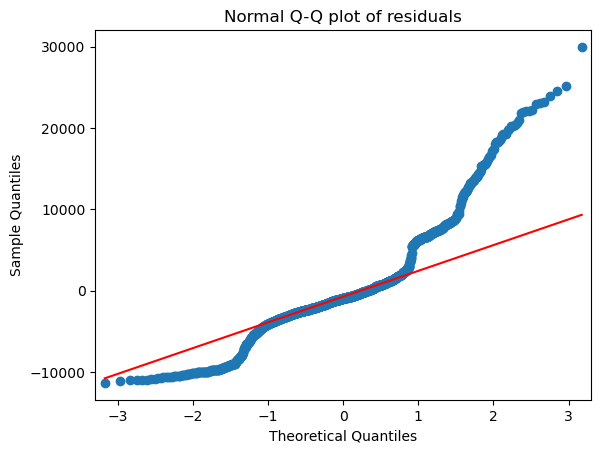

In [83]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

# Residual Plot for Homoscedasticity

In [86]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

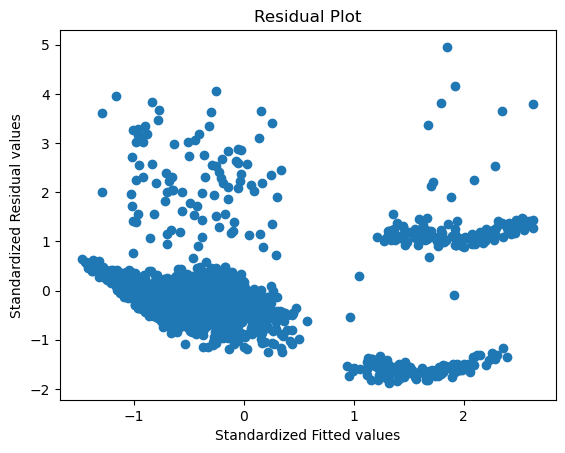

In [88]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual values')
plt.show()

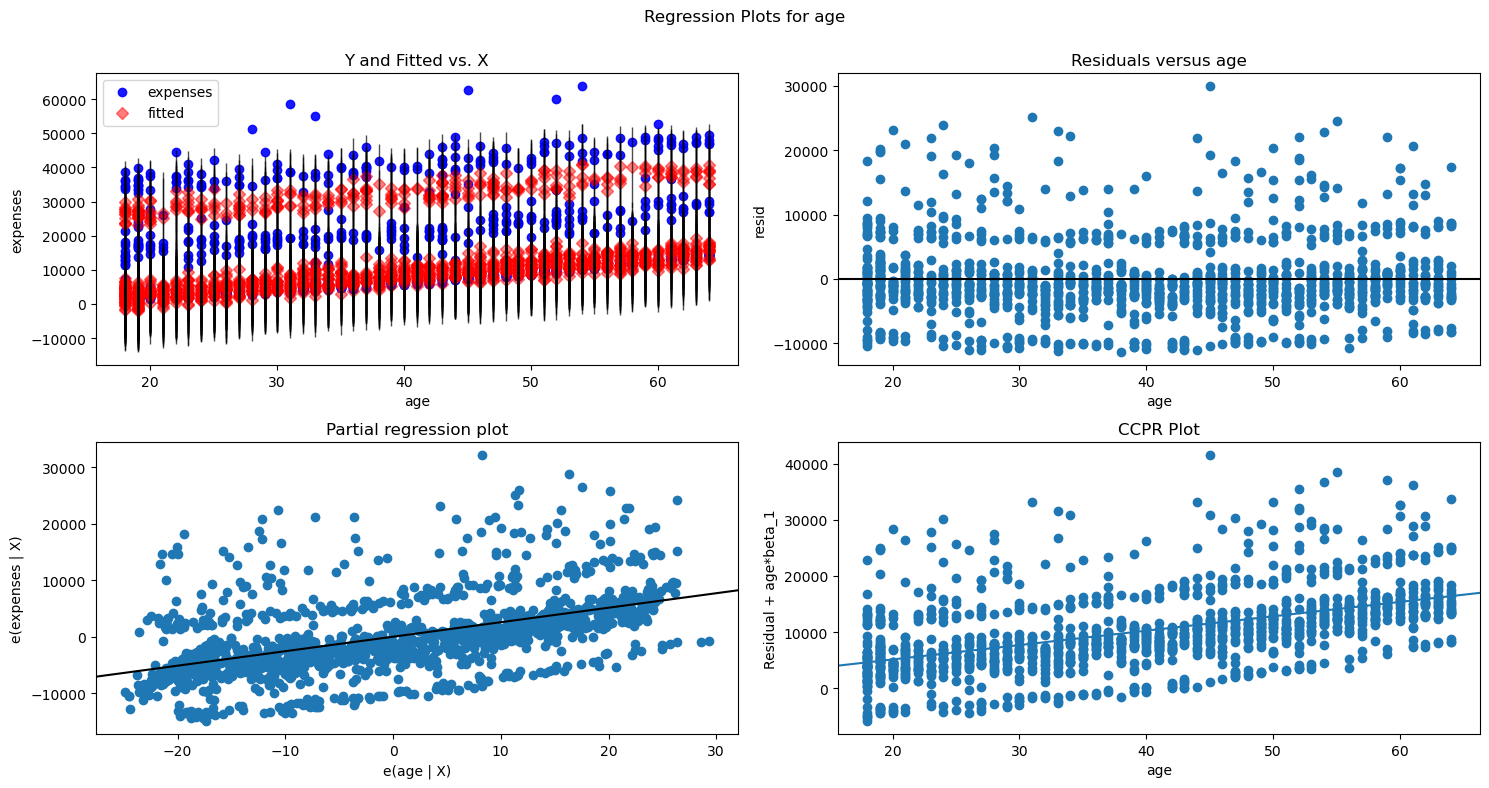

In [90]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'age', fig = fig)
plt.show()

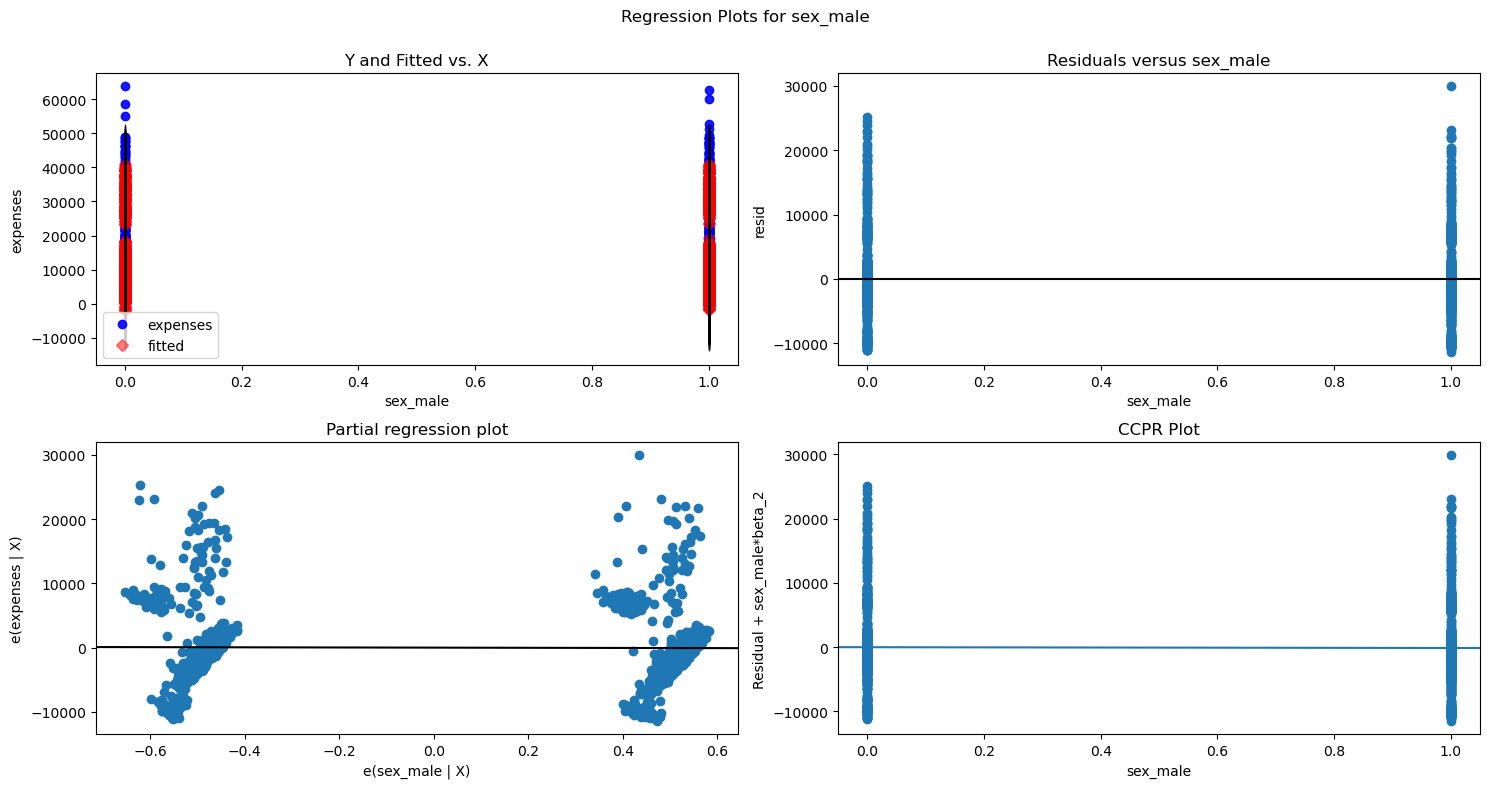

In [91]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'sex_male', fig = fig)
plt.show()

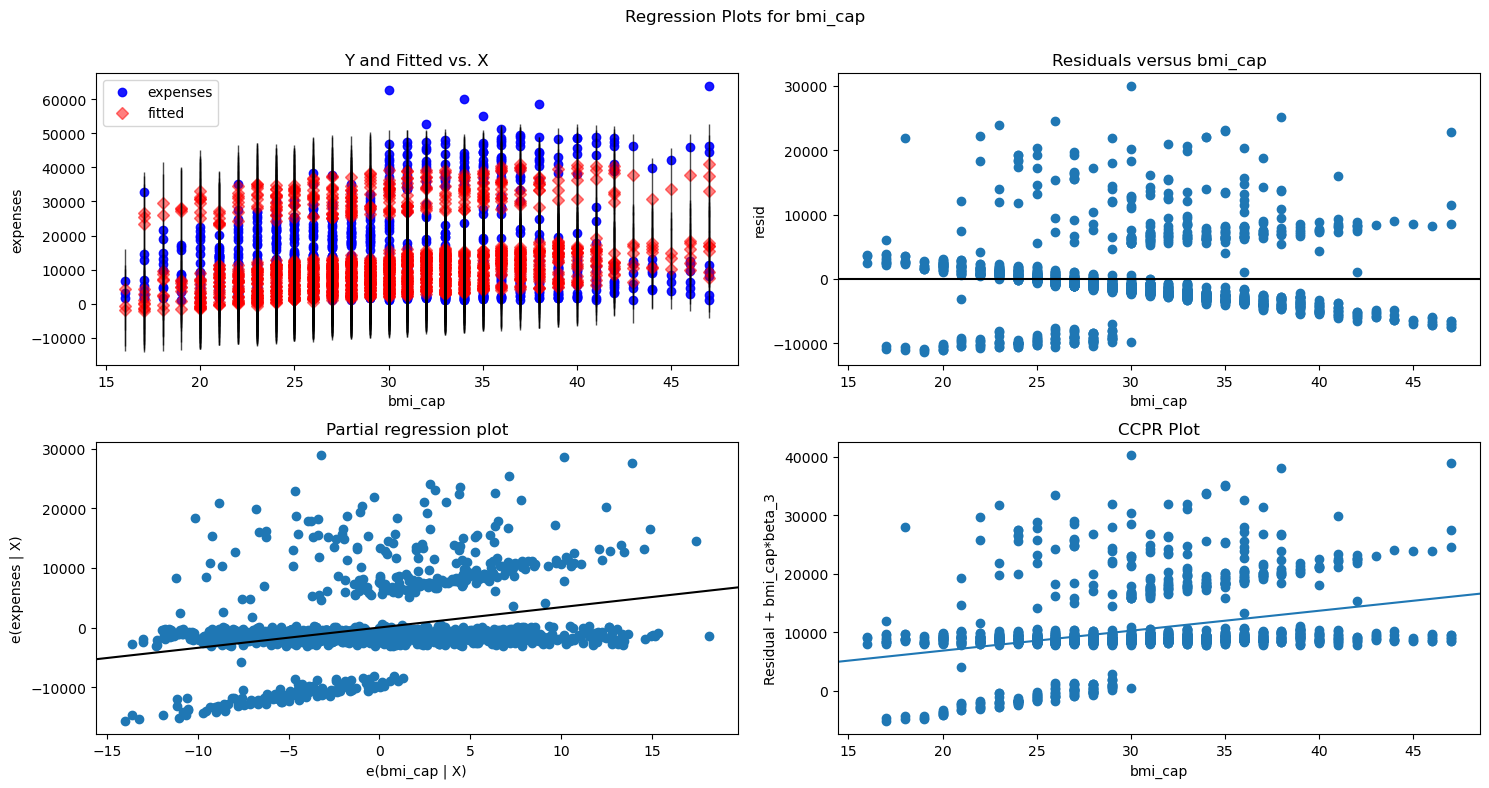

In [93]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'bmi_cap', fig = fig)
plt.show()

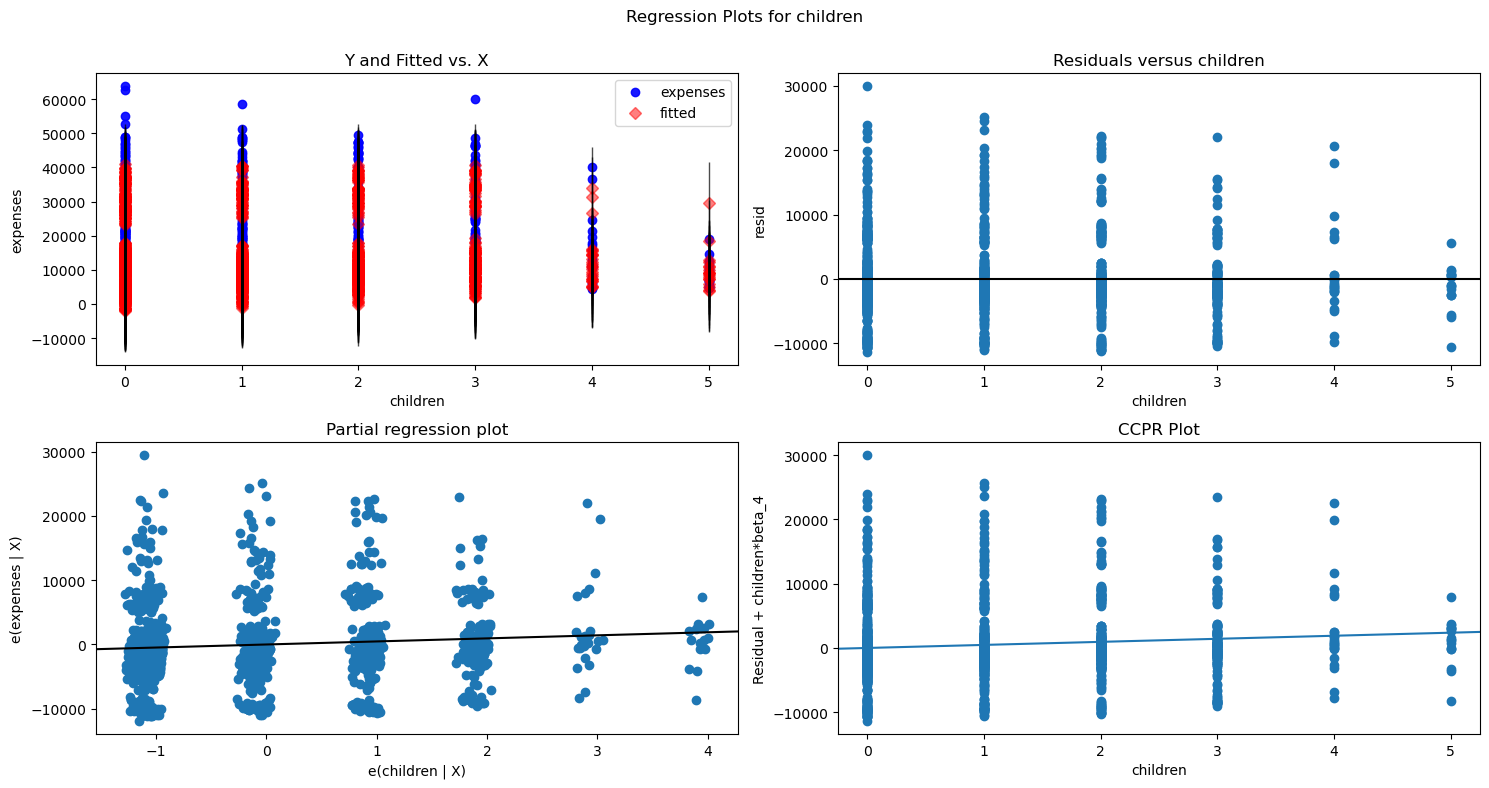

In [94]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'children', fig = fig)
plt.show()

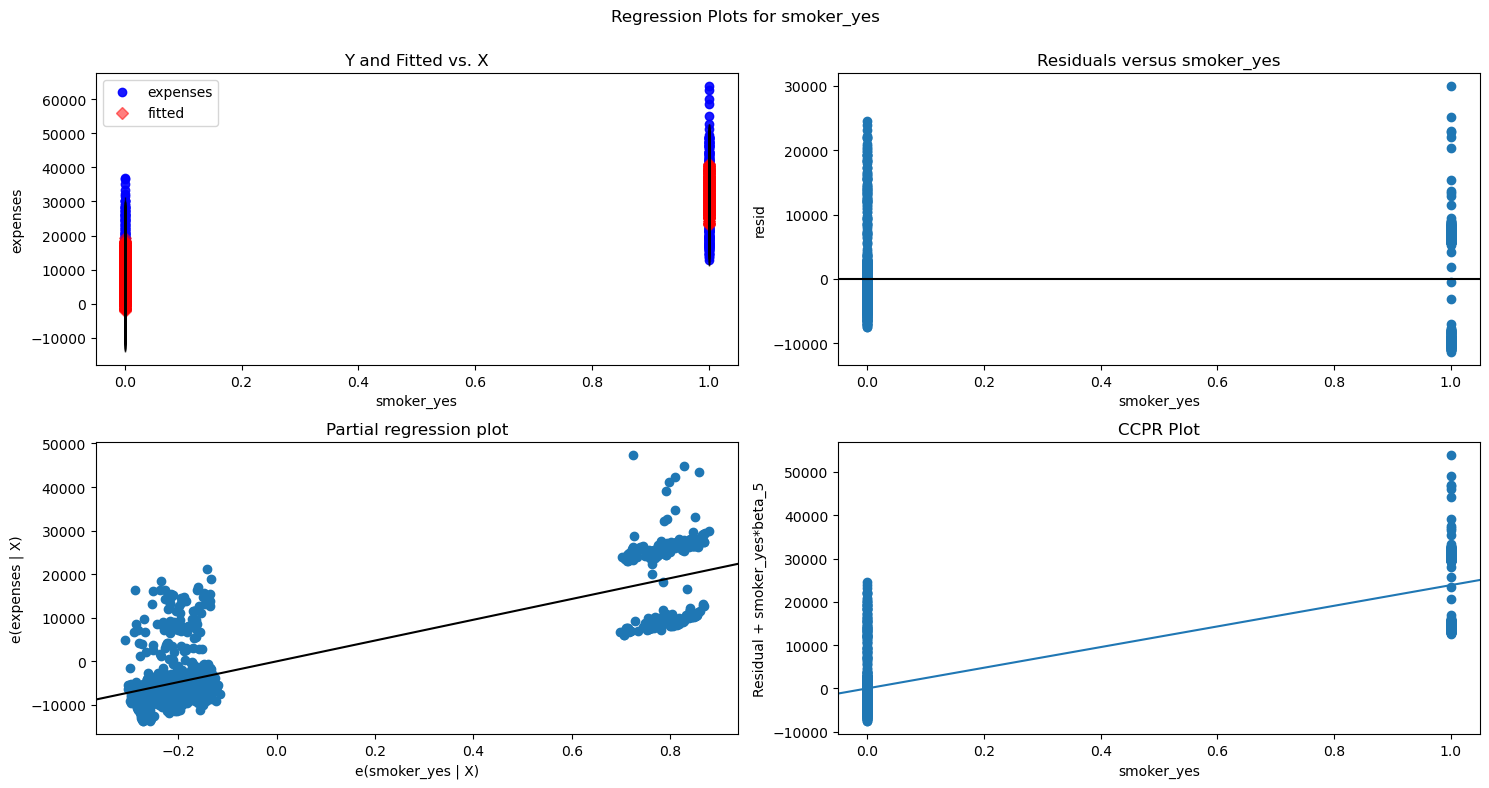

In [96]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'smoker_yes', fig = fig)
plt.show()

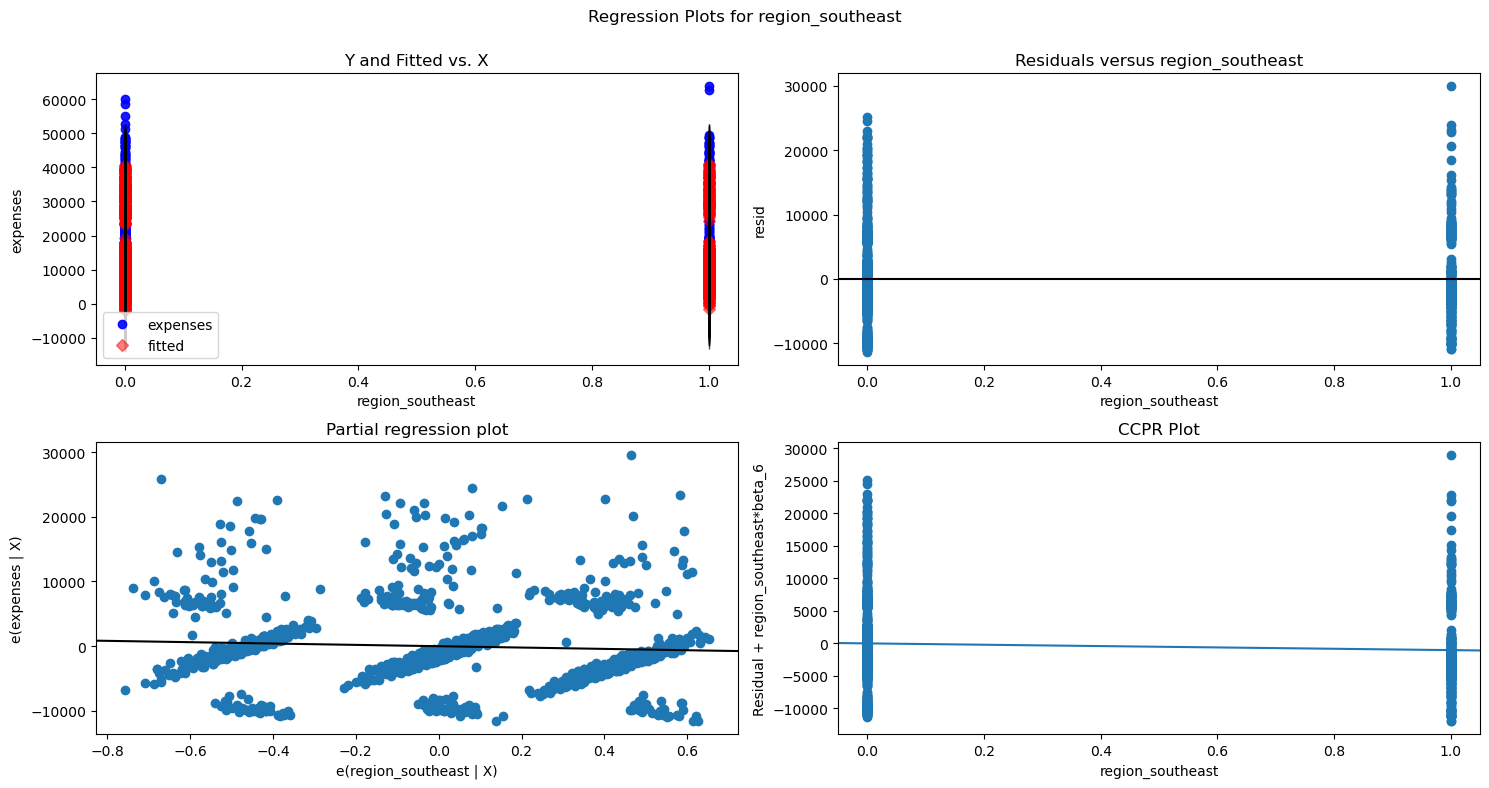

In [97]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'region_southeast', fig = fig)
plt.show()

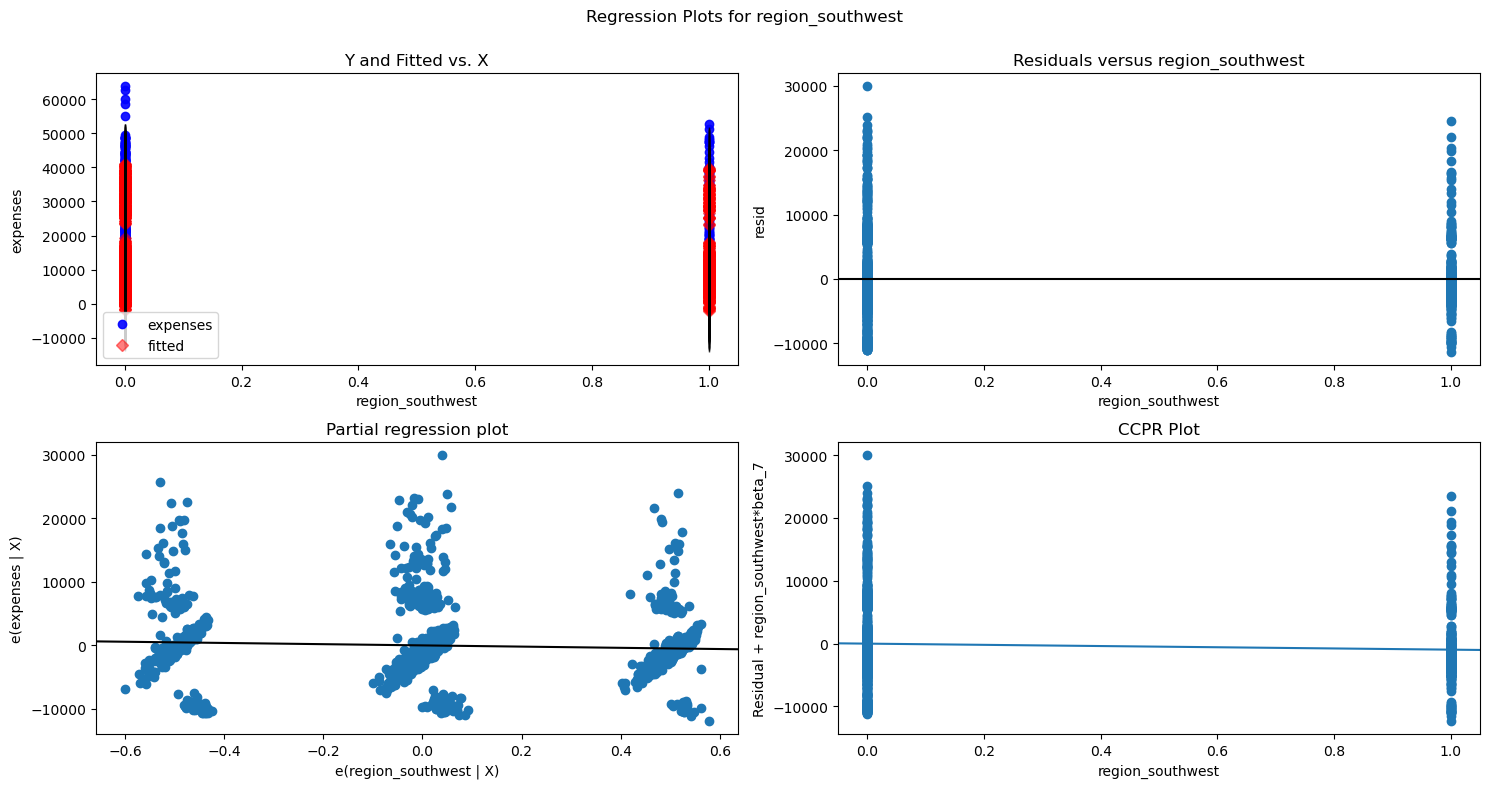

In [98]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'region_southwest', fig = fig)
plt.show()

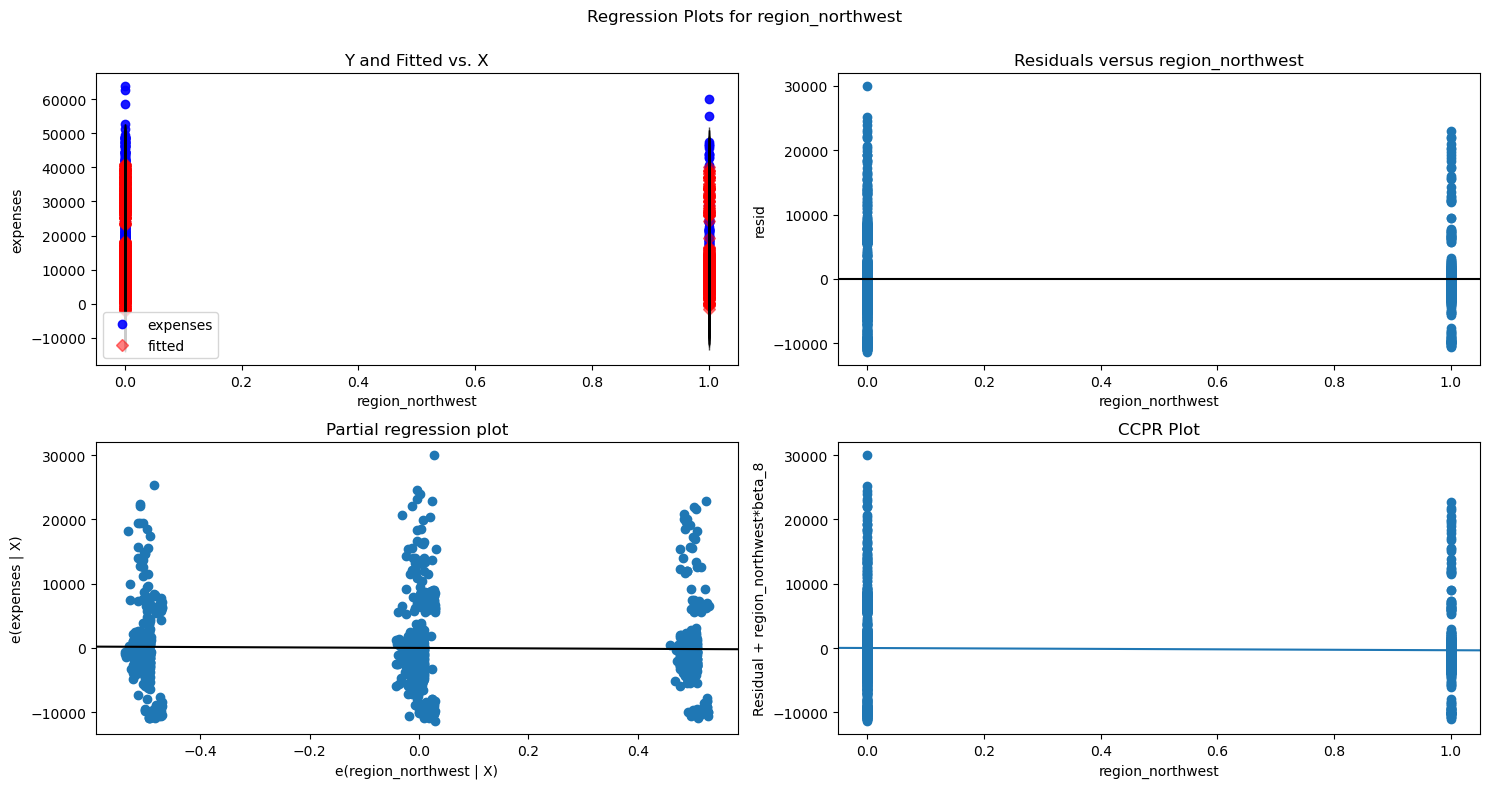

In [104]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'region_northwest', fig = fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

# Cook’s Distance

In [109]:
# calculate cook's distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

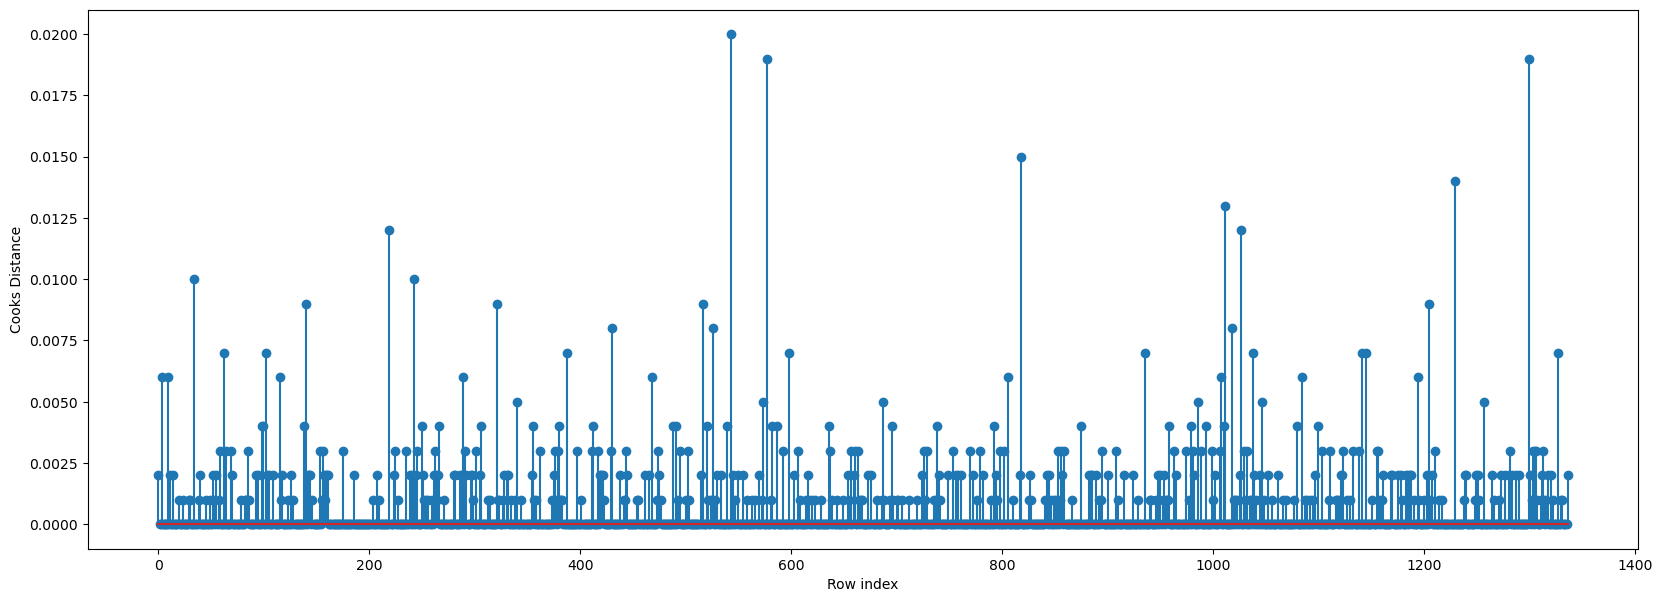

In [111]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

# High Influence points

<Figure size 1200x600 with 0 Axes>

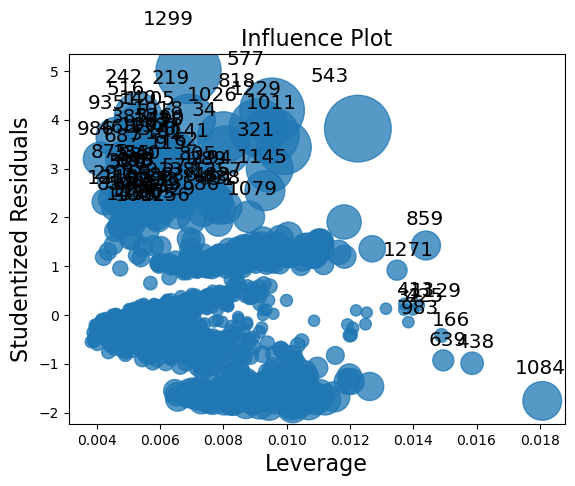

In [114]:
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize = (12,6))
influence_plot(model)
plt.show()

In [115]:
data.shape

(1337, 9)

In [116]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02243829468960359

# Build Model

In [122]:
data.head()

,age,children,expenses,bmi_cap,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,0,16884,27,0,1,0,0,1
1,18,1,1725,33,1,0,0,1,0
2,28,3,4449,33,1,0,0,1,0
3,33,0,21984,22,1,0,1,0,0
4,32,0,3866,28,1,0,1,0,0


In [124]:
# age + sex_male + bmi_cap + children + smoker_yes + region_southeast
data_reg = data.drop(columns = ['sex_male','region_northwest','region_southwest'])
data_reg

,age,children,expenses,bmi_cap,smoker_yes,region_southeast
0,19,0,16884,27,1,0
1,18,1,1725,33,0,1
2,28,3,4449,33,0,1
3,33,0,21984,22,0,0
4,32,0,3866,28,0,0
...,...,...,...,...,...,...
1332,50,3,10600,31,0,0
1333,18,0,2205,31,0,0
1334,18,0,1629,36,0,1
1335,21,0,2007,25,0,0


In [132]:
model_new = smf.ols('expenses ~ age + children + bmi_cap + smoker_yes +	region_southeast',data = data_reg).fit()

In [134]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.6
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:34:46   Log-Likelihood:                -13540.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1331   BIC:                         2.712e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.216e+04    940.303    -12.930      0.000    -1.4e+04   -1.03e+04
age                256.5876     11.917     21.531      0.000     233.209     279.966
children           467.6408    137.848      3.392      0.001     197.218     738.063
bmi_cap            335.5143     28.595     11.733      0.000     279.419     391.610
smoker_yes        2.386e+04    412.164     57.886      0.000     2.3e+04    2.47e+04
region_southeast  -583.4635    388.584     -1.502      0.133   -1345.766     178.840
==============================================================================
Omnibus:                      302.672   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.617
Skew:                           1.221   Prob(JB):                    4.48e-158
Kurtosis:                       5.654   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
#New data for prediction
new_data=pd.DataFrame({'age':32,"bmi_cap": 28,"children":0,'smoker_yes': 0,'region_southeast':0},index=[1])
new_data

,age,bmi_cap,children,smoker_yes,region_southeast
1,32,28,0,0,0


In [138]:
model_new.predict(new_data)

1    5447.224398
dtype: float64

# Split the dataset into training and testing sets (80,20)

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
data_reg

,age,children,expenses,bmi_cap,smoker_yes,region_southeast
0,19,0,16884,27,1,0
1,18,1,1725,33,0,1
2,28,3,4449,33,0,1
3,33,0,21984,22,0,0
4,32,0,3866,28,0,0
...,...,...,...,...,...,...
1332,50,3,10600,31,0,0
1333,18,0,2205,31,0,0
1334,18,0,1629,36,0,1
1335,21,0,2007,25,0,0


In [143]:
x = data_reg.drop(columns = 'expenses')
y = data_reg['expenses']

In [144]:
x.shape,y.shape

((1337, 5), (1337,))

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1069, 5), (268, 5), (1069,), (268,))

In [198]:
# Transform target before training
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [146]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Model 1: Multiple Linear Regression

In [219]:

# Train with log-transformed y
lin_model = LinearRegression()
lin_model.fit(x_train, y_train_log)

# Get coefficients
coefficients = pd.DataFrame(lin_model.coef_, x.columns, columns=['Coefficient'])
print(coefficients)

# Predictions
y_pred_log = lin_model.predict(x_test)
y_pred_linear = np.expm1(y_pred_log)

                  Coefficient
age                  0.034074
children             0.099429
bmi_cap              0.012453
smoker_yes           1.531673
region_southeast    -0.076331


# Model 2: Lasso Regression

In [221]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train_log)
y_predlog_lasso = lasso.predict(x_test)
y_pred_lasso = np.expm1(y_predlog_lasso)

# Model 3: Ridge Regression

In [224]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train_log)
y_predlog_ridge = ridge.predict(x_test)
y_pred_ridge = np.expm1(y_predlog_ridge)

# Model 4: XGBoost

In [210]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
}

grid = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'),
                    param_grid, scoring='neg_mean_squared_error',
                    cv=3, verbose=1, n_jobs=-1)

grid.fit(x_train, y_train_log)

print("Best parameters:", grid.best_params_)
print("Best RMSE:", np.sqrt(-grid.best_score_))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best RMSE: 0.3872730961171365


In [226]:
# Use best parameters from grid search
best_params = grid.best_params_
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params, gamma=0, reg_alpha=0.1, reg_lambda=1, min_child_weight=1, random_state=42, n_jobs=-1)       
xgb_model.fit(x_train, y_train_log)
y_predlog_xgboost = xgb_model.predict(x_test)
y_pred_xgboost = np.expm1(y_predlog_xgboost)

# Model 5: Random Forest Model

In [214]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_rf.fit(x_train, y_train_log)

# View best params
print("Best RF Parameters:", grid_rf.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best RF Parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [228]:
best_params_rf = grid_rf.best_params_

RandomForest_model = RandomForestRegressor(
    **best_params_rf,
    random_state=42,
    n_jobs=-1
)

RandomForest_model.fit(x_train, y_train_log)
y_predlog_rf = RandomForest_model.predict(x_test)
y_pred_rf = np.expm1(y_predlog_rf)

# Model Evaluation

In [230]:
# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}\n")

# Evaluate all models
evaluate_model(y_test, y_pred_linear, "Multiple Linear Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_xgboost, "XGBoost")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Multiple Linear Regression Performance:
MAE: 3850.09
MSE: 51126366.51
RMSE: 7150.27
R² Score: 0.72

Lasso Regression Performance:
MAE: 5142.60
MSE: 85047567.96
RMSE: 9222.12
R² Score: 0.54

Ridge Regression Performance:
MAE: 3849.68
MSE: 51089438.56
RMSE: 7147.69
R² Score: 0.72

XGBoost Performance:
MAE: 2088.97
MSE: 19646721.06
RMSE: 4432.46
R² Score: 0.89

Random Forest Performance:
MAE: 2328.24
MSE: 21949587.78
RMSE: 4685.04
R² Score: 0.88



In [234]:
# Build output DataFrame from original data using saved indices
# Create DataFrame only for test data
test_data = data_reg.loc[x_test.index]

MedicalCost_Prediction = pd.DataFrame({
    'Age': test_data['age'].values,
    'Children': test_data['children'].values,
    'Bmi': test_data['bmi_cap'].values,
    'is_smoker': test_data['smoker_yes'].values,
    'Region_southeast': test_data['region_southeast'].values,
    'Actual_cost': y_test.values,
    'Predicted_cost_linear': y_pred_linear,
    'Predicted_cost_lasso' : y_pred_lasso,
    'Predicted_cost_ridge' : y_pred_ridge,
    'Predicted_cost_XGBoost' : y_pred_xgboost,
    'Predicted_cost_RandomForest' : y_pred_rf
})
MedicalCost_Prediction.head()

,Age,Children,Bmi,is_smoker,Region_southeast,Actual_cost,Predicted_cost_linear,Predicted_cost_lasso,Predicted_cost_ridge,Predicted_cost_XGBoost,Predicted_cost_RandomForest
0,49,0,22,0,0,8688,7563.941802,9337.986080,7565.227631,9461.151367,9784.797111
1,29,4,25,0,0,5708,5911.824711,5602.319048,5912.872457,7004.910156,7288.491328
2,51,3,36,0,0,11436,12990.622431,12287.689348,12992.231281,12020.592773,12692.423747
3,31,3,34,1,0,38746,29652.900136,15261.964066,29630.374977,36371.207031,34988.479789
4,31,2,38,0,1,4463,5650.787642,6168.503218,5652.161015,5381.591309,5095.655671


# Deployment

In [236]:
from pickle import dump
dump(model, open('MedicalCost_Prediction.pkl','wb')) 